MENTAL HEALTH DATA

Library and data loading

In [339]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [340]:
data = pd.read_csv('ex2.csv')
data.head(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-6,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-6,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,8/27/2014 11:31,33,Male,United States,TN,NaN,Yes,No,Sometimes,25-6,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,8/27/2014 11:31,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1 to 5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,8/27/2014 11:32,39,M,Canada,NaN,NaN,No,No,Never,1 to 5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,8/27/2014 11:32,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,8/27/2014 11:32,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


- Timestamp: times' survey
- Age: number of age
- Gender: Male, Female
- Country: name of country
- state: If you live in the United States, which state or territory do you live in?
- self_employed: yes, no
- family_history: Yes, No
- treatment: Yes, No
- work_interfere: Never, Rarely, Often, Sometimes
- no_employees: numbers of employees
- remote_work: yes, no
- tech_company: : Is your employer primarily a tech company/organization?
- benefits:your employer provide mental health benefits? yes, no
- care_options: the options for mental health care your employer provides (yes,no, not sure)
- wellness_program: Has your employer ever discussed mental health as part of an employee wellness program? (yes, no, not sure)
- seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help? (yes, no, don't know)
- anonymity: Tính ẩn danh của bạn có được bảo vệ nếu bạn chọn tận dụng các nguồn lực điều trị lạm dụng chất kích thích hoặc sức khỏe tâm thần không? (yes,no, don't know)
- leave: How easy is it for you to take medical leave for a mental health condition? (somewhat easy, don't know, somewhat difficult, don't know, very difficult, very easy)
- mental_health_consequence: discussing a mental health issue with your employer would have negative consequences (yes, no, maybe)
- phys_health_consequence: discussing a physical health issue with your employer would have negative consequences (yes, no, maybe)
- coworkers: discuss a mental health issue with your coworkers (no, yes, some of them)
- supervisor: discuss a mental health issue with your direct supervisor(s) (no, yes, some of them)
- mental_health_interview: you bring up a mental health issue with a potential employer in an interview? (yes, no, maybe)
- obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace? (yes, no)
- comments : Any additional notes or comment

In [341]:
data.describe(include="all")

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,884,NaN,49,48,45,2,2,2,4,6,...,5,3,3,3,3,3,3,3,2,160
top,8/27/2014 12:31,NaN,Male,United States,CA,No,No,Yes,Sometimes,25-6,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,8,NaN,615,751,138,1095,767,637,465,290,...,563,490,925,774,516,1008,557,576,1075,5
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


CLEANING DATA

In [342]:
#count how many null values
data.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [343]:
null_data=data.isnull()
null_data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


self_employed has 18 null values in total 1259 values and the value "no" is more than "yes" so we fill "No" for the null values

work_interfere has 264 null values, this number is nearly the same as the number of 4 values in this column (Never,Often,Rarely,Sometimes) so we can fill the null with the fifth value "No Answer"

In [344]:
temp = data.groupby(['self_employed'])['Age'].count()
temp

self_employed
No     1095
Yes     146
Name: Age, dtype: int64

In [345]:
temp = data.groupby(['work_interfere'])['Age'].count()
temp

work_interfere
Never        213
Often        144
Rarely       173
Sometimes    465
Name: Age, dtype: int64

In [346]:
data["self_employed"]=data["self_employed"].fillna('No')
data["work_interfere"]=data["work_interfere"].fillna('No Answer')

In [347]:
data.reset_index(drop=True,inplace=True)
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/2014 11:29,37,Female,United States,IL,No,No,Yes,Often,25-6,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29,44,M,United States,IN,No,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29,32,Male,Canada,NaN,No,No,No,Rarely,25-6,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,No,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30,31,Male,United States,TX,No,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,9/12/2015 11:17,26,male,United Kingdom,NaN,No,No,Yes,No Answer,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,9/26/2015 1:07,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,11/7/2015 12:36,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,11/30/2015 21:25,46,f,United States,NC,No,No,No,No Answer,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


Drop columns that is not neccessary

In [348]:
data.drop(columns= ['Timestamp','state','comments'],inplace = True)
data.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,No,Yes,Often,25-6,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,No,No,No,Rarely,25-6,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,No,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [349]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   Country                    1259 non-null   object
 3   self_employed              1259 non-null   object
 4   family_history             1259 non-null   object
 5   treatment                  1259 non-null   object
 6   work_interfere             1259 non-null   object
 7   no_employees               1259 non-null   object
 8   remote_work                1259 non-null   object
 9   tech_company               1259 non-null   object
 10  benefits                   1259 non-null   object
 11  care_options               1259 non-null   object
 12  wellness_program           1259 non-null   object
 13  seek_help                  1259 non-null   object
 14  anonymit

In [350]:
data.dtypes

Age                           int64
Gender                       object
Country                      object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
dtype: object

In [351]:
temp = data.groupby(['Age'])['Age'].count()
temp

Age
-1726            1
-29              1
-1               1
 5               1
 8               1
 11              1
 18              7
 19              9
 20              6
 21             16
 22             21
 23             51
 24             46
 25             61
 26             75
 27             71
 28             68
 29             85
 30             63
 31             67
 32             82
 33             70
 34             65
 35             55
 36             37
 37             43
 38             39
 39             33
 40             33
 41             21
 42             20
 43             28
 44             11
 45             12
 46             12
 47              2
 48              6
 49              4
 50              6
 51              5
 53              1
 54              3
 55              3
 56              4
 57              3
 58              1
 60              2
 61              1
 62              1
 65              1
 72              1
 329             1
 9999999

Check the values of Age column, we find that many values is not correct, so we replace these values with mean value

In [352]:
#a = data["Age"]
b = data["Age"].mean()

for i in data["Age"]:
    if i < 18:
        data["Age"].replace(i,b,inplace=True)
    if i > 100:
        data["Age"].replace(i,b,inplace=True)
print(data["Age"])

0       37.0
1       44.0
2       32.0
3       31.0
4       31.0
        ... 
1254    26.0
1255    32.0
1256    34.0
1257    46.0
1258    25.0
Name: Age, Length: 1259, dtype: float64


In [353]:
#data["Age"] = pd.cut(x=data["Age"],bins=[18,28,34,72], labels=["18-28","28-34","34-72"])

In [354]:
temp = data.groupby(['Gender'])['Gender'].count()
temp

Gender
A little about you                                  1
Agender                                             1
All                                                 1
Androgyne                                           1
Cis Female                                          1
Cis Male                                            2
Cis Man                                             1
Enby                                                1
F                                                  38
Femake                                              1
Female                                            121
Female                                              2
Female (cis)                                        1
Female (trans)                                      2
Genderqueer                                         1
Guy (-ish) ^_^                                      1
M                                                 116
Mail                                                1
Make                 

Check the Gender colomn, we find that has many different values so we have to group them to 4 main groups male, female, trans and others

In [355]:
male = ["Male ","M","Cis Man","male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male","Mail","Make","Male","Mal","Male (CIS)","Male-ish","Malr","Man",""]
trans = ["All","trans-female", "something kinda male?", "queer/she/they","Female (trans)", "non-binary", "all", "enby", "fluid", "genderqueer","Androgyne", "androgyne","Agender", "agender","Genderqueer", "male leaning androgynous", "guy (-ish) ^_^","Guy (-ish) ^_^" ,"trans woman", "neuter", "female (trans)", "queer", "ostensibly male","Trans woman","Trans-female"]           
female = ["Female ","Woman", "F","cis female","Cis Female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail","Femake","Female","Female (cis)"]
others = ["nah","unsure what that really means","p","A little about you","Enby","Nah","Neuter","ostensibly male, unsure what that really means"]
for i in data["Gender"]:
    if i in male:
        data["Gender"].replace(i,"Male",inplace=True)
    if i in trans:
        data["Gender"].replace(i,"Trans",inplace=True)
    if i in female:
        data["Gender"].replace(i,"Female",inplace=True)
    if i in others:
        data["Gender"].replace(i,"Others",inplace=True)
print(data["Gender"])

0       Female
1         Male
2         Male
3         Male
4         Male
         ...  
1254      Male
1255      Male
1256      Male
1257    Female
1258      Male
Name: Gender, Length: 1259, dtype: object


In [356]:
temp = data.groupby(['Gender'])['Gender'].count()
temp

Gender
Female    247
Male      991
Others      6
Trans      15
Name: Gender, dtype: int64

In [357]:
data.tail(10)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
1249,30.0,Male,United States,No,Yes,Yes,Sometimes,26-100,No,Yes,...,Yes,Very easy,No,No,Yes,Yes,Maybe,Maybe,Yes,No
1250,30.0,Male,United States,Yes,Yes,Yes,Often,26-100,No,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Maybe,Maybe,Yes,No
1251,36.0,Male,South Africa,No,Yes,Yes,Often,100-500,No,No,...,Don't know,Somewhat easy,No,No,Some of them,Yes,No,Yes,Yes,No
1252,29.0,Male,United States,No,Yes,Yes,Sometimes,100-500,Yes,Yes,...,Yes,Don't know,Yes,No,Some of them,No,No,Maybe,No,No
1253,36.0,Male,United States,No,Yes,No,Rarely,More than 1000,No,No,...,Don't know,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No
1254,26.0,Male,United Kingdom,No,No,Yes,No Answer,26-100,No,Yes,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32.0,Male,United States,No,Yes,Yes,Often,26-100,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34.0,Male,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46.0,Female,United States,No,No,No,No Answer,100-500,Yes,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No
1258,25.0,Male,United States,No,Yes,Yes,Sometimes,26-100,No,No,...,Yes,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No


Convariance Matrix. Variability comparison between categories of variables

In [358]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [359]:
le = preprocessing.LabelEncoder()

In [360]:
categorical_feature_mask = data.dtypes==object
categorical_cols = data.columns[categorical_feature_mask].tolist()

In [361]:
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))

In [362]:
data.corr()


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
Age,1.000000,0.113685,0.011756,0.095916,-0.002587,0.019041,-0.029878,-0.059263,0.057023,-0.014308,...,0.020056,0.044513,0.054376,0.089271,0.019707,0.002587,0.094405,0.031169,0.041712,0.051807
Gender,0.113685,1.000000,-0.078599,0.050019,-0.102415,-0.119229,-0.075199,-0.018901,0.000056,0.056170,...,-0.002630,0.041105,0.044059,0.032907,0.052196,0.063350,-0.013132,-0.008173,0.008012,-0.015144
Country,0.011756,-0.078599,1.000000,-0.120493,0.062107,0.077681,0.027284,0.146684,-0.017342,-0.041091,...,0.002034,-0.102454,-0.045102,-0.016538,-0.030811,-0.001308,0.052658,-0.016293,-0.011894,-0.070225
self_employed,0.095916,0.050019,-0.120493,1.000000,0.009890,0.020493,0.022619,-0.403136,0.316533,0.080136,...,0.107915,0.179395,0.030552,0.028461,0.076252,0.037432,-0.006372,-0.020000,0.139845,0.081899
family_history,-0.002587,-0.102415,0.062107,0.009890,1.000000,0.377918,0.316295,-0.017774,0.014456,-0.046079,...,0.063679,0.022631,0.028196,0.002832,-0.000847,0.003729,0.044564,0.039894,0.041089,0.124861
treatment,0.019041,-0.119229,0.077681,0.020493,0.377918,1.000000,0.580216,-0.016341,0.026937,-0.031525,...,0.142889,0.061549,0.030221,-0.008933,0.068433,-0.036199,0.098413,0.051859,0.062642,0.156972
work_interfere,-0.029878,-0.075199,0.027284,0.022619,0.316295,0.580216,1.000000,-0.043390,0.036634,0.001057,...,0.075588,0.050527,0.051291,-0.034232,0.007023,-0.092664,0.099082,-0.005355,0.040891,0.127371
no_employees,-0.059263,-0.018901,0.146684,-0.403136,-0.017774,-0.016341,-0.043390,1.000000,-0.234698,-0.197539,...,0.004902,-0.157153,-0.002541,-0.064052,-0.120160,-0.099514,0.059330,0.047097,-0.051444,0.019944
remote_work,0.057023,0.000056,-0.017342,0.316533,0.014456,0.026937,0.036634,-0.234698,1.000000,0.131108,...,-0.002676,0.099669,0.054828,-0.009578,0.082438,0.025220,-0.029730,-0.014344,0.036591,-0.039065
tech_company,-0.014308,0.056170,-0.041091,0.080136,-0.046079,-0.031525,0.001057,-0.197539,0.131108,1.000000,...,-0.050912,0.047363,0.001336,0.066134,0.075383,0.049543,-0.041117,-0.032186,0.029191,-0.062347


In [363]:
temp = data.corr()['treatment']
temp[abs(temp) >= 0.1]

Gender            -0.119229
family_history     0.377918
treatment          1.000000
work_interfere     0.580216
benefits           0.226140
care_options       0.236578
anonymity          0.142889
obs_consequence    0.156972
Name: treatment, dtype: float64

drop some columns has Pearson correlation coefficient

In [364]:
data.drop(columns= ['no_employees','remote_work','tech_company','mental_health_consequence','phys_health_consequence','wellness_program','coworkers','seek_help','supervisor','mental_health_interview','phys_health_interview','mental_vs_physical','leave'],inplace = True)
data.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,benefits,care_options,anonymity,obs_consequence
0,37.0,0,45,0,0,1,2,2,1,2,0
1,44.0,1,45,0,0,0,3,0,0,0,0
2,32.0,1,7,0,0,0,3,1,0,0,0
3,31.0,1,44,0,1,1,2,1,2,1,1
4,31.0,1,45,0,0,0,0,2,0,0,0


In [387]:
data_corr = data.corr()
data_corr

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,benefits,care_options,anonymity,obs_consequence
Age,1.000000,0.113685,0.011756,0.095916,-0.002587,0.019041,-0.029878,0.030606,0.038846,0.020056,0.051807
Gender,0.113685,1.000000,-0.078599,0.050019,-0.102415,-0.119229,-0.075199,-0.071641,-0.051910,-0.002630,-0.015144
Country,0.011756,-0.078599,1.000000,-0.120493,0.062107,0.077681,0.027284,0.099703,0.073719,0.002034,-0.070225
self_employed,0.095916,0.050019,-0.120493,1.000000,0.009890,0.020493,0.022619,-0.050412,0.047625,0.107915,0.081899
family_history,-0.002587,-0.102415,0.062107,0.009890,1.000000,0.377918,0.316295,0.128490,0.107764,0.063679,0.124861
treatment,0.019041,-0.119229,0.077681,0.020493,0.377918,1.000000,0.580216,0.226140,0.236578,0.142889,0.156972
work_interfere,-0.029878,-0.075199,0.027284,0.022619,0.316295,0.580216,1.000000,0.116818,0.145202,0.075588,0.127371
benefits,0.030606,-0.071641,0.099703,-0.050412,0.128490,0.226140,0.116818,1.000000,0.441261,0.337122,0.069650
care_options,0.038846,-0.051910,0.073719,0.047625,0.107764,0.236578,0.145202,0.441261,1.000000,0.347801,0.073626
anonymity,0.020056,-0.002630,0.002034,0.107915,0.063679,0.142889,0.075588,0.337122,0.347801,1.000000,0.054220


Some charts to see data relationship

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'work_interfere')

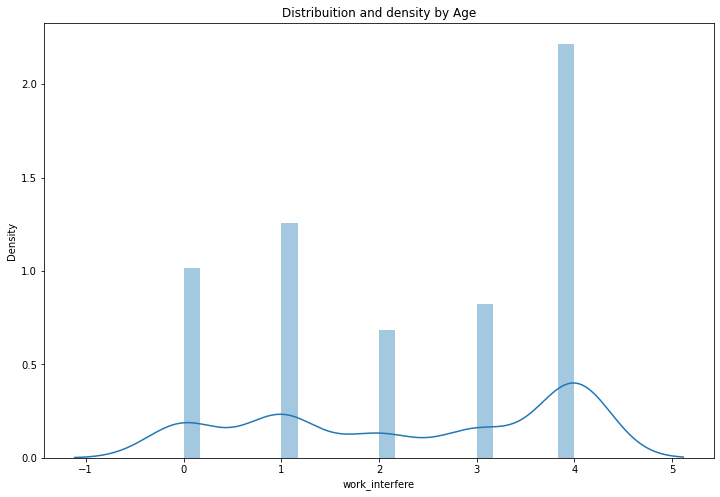

In [393]:
plt.figure(figsize=(12,8))
sns.distplot(data["work_interfere"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("work_interfere")

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Treatment - work_interfere')

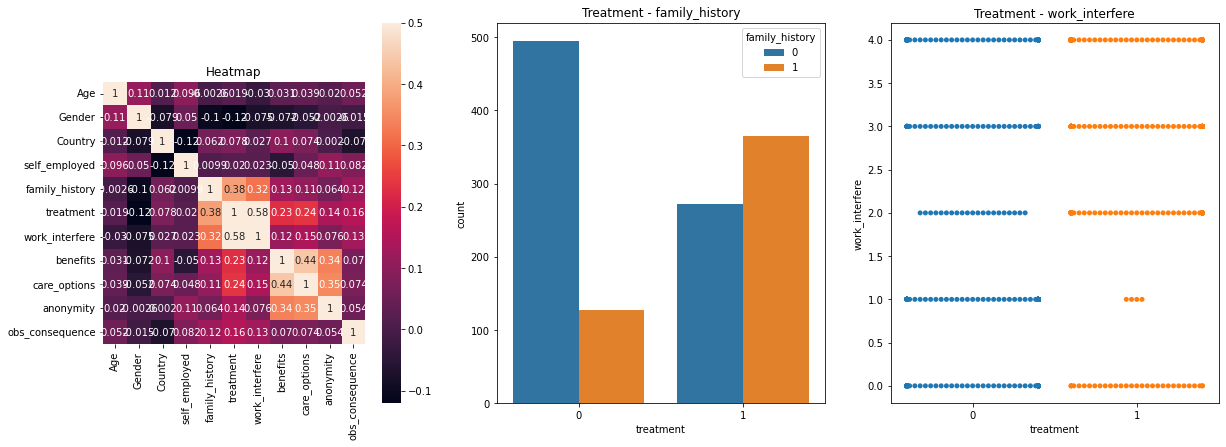

In [394]:
#fg, ax = plt.subplots(1, 3, figsize=(16, 12))

plt.figure(figsize=(20, 7))
plt.subplot(1,3,1)
sns.heatmap(data_corr, vmax=.5, square=True,annot=True)
plt.title("Heatmap")

plt.subplot(1,3,2)
sns.countplot(x= 'treatment', hue= 'family_history', data= data)
plt.title("Treatment - family_history")

plt.subplot(1,3,3)
sns.swarmplot(data=data,x='treatment',y='work_interfere')
plt.title("Treatment - work_interfere")


Scaling and fitting

Tuning

Logistic Regression

In [367]:
features=["Age","Gender","Country","self_employed","family_history"]
x = data[features].values
y = data["treatment"].values
data["treatment"].value_counts()

1    637
0    622
Name: treatment, dtype: int64

In [368]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x)
scaler

StandardScaler()

In [369]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [370]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
lr = logreg.fit(X_train,y_train)

In [371]:
lr.score(X_test, y_test)

0.5026455026455027

In [372]:
y_pred=logreg.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]


10.	KNeighbors Classifier

In [398]:
!pip install kneed

Defaulting to user installation because normal site-packages is not writeable


In [399]:
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [400]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [374]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.6005291005291006

In [401]:
for k in range (5,15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    print("Accuracy at k =",k,metrics.accuracy_score(y_test, y_pred))

Accuracy at k = 5 0.6005291005291006
Accuracy at k = 6 0.5952380952380952
Accuracy at k = 7 0.6190476190476191
Accuracy at k = 8 0.6164021164021164
Accuracy at k = 9 0.6058201058201058
Accuracy at k = 10 0.6084656084656085
Accuracy at k = 11 0.6031746031746031
Accuracy at k = 12 0.6084656084656085
Accuracy at k = 13 0.6111111111111112
Accuracy at k = 14 0.5978835978835979


K = 7 the result is more detailed and reasonable

11.	Decision Tree Classifier

In [376]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
import graphviz

In [377]:
decision_tree = DecisionTreeClassifier(random_state=0, max_features=3)
decision_tree = decision_tree.fit(x, y)
r = export_text(decision_tree,feature_names=features)

In [378]:
print(r)

|--- family_history <= 0.50
|   |--- Gender <= 0.50
|   |   |--- Age <= 22.50
|   |   |   |--- Country <= 44.50
|   |   |   |   |--- class: 0
|   |   |   |--- Country >  44.50
|   |   |   |   |--- Age <= 21.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age >  21.00
|   |   |   |   |   |--- class: 0
|   |   |--- Age >  22.50
|   |   |   |--- Age <= 46.50
|   |   |   |   |--- self_employed <= 0.50
|   |   |   |   |   |--- Country <= 4.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Country >  4.50
|   |   |   |   |   |   |--- Country <= 44.50
|   |   |   |   |   |   |   |--- Age <= 27.50
|   |   |   |   |   |   |   |   |--- Country <= 38.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Country >  38.50
|   |   |   |   |   |   |   |   |   |--- Age <= 23.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Age >  23.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|  

12.	Random Forests

In [379]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [380]:
rdf_clf = RandomForestClassifier(
    max_depth = 3,
    max_leaf_nodes = 16,
    min_samples_split = 10,
    min_samples_leaf = 10
)
rdf_clf.fit(X_train, y_train)

y_pred = rdf_clf.predict(X_test)
scores = accuracy_score(y_pred, y_test)
print('RandomForest Accuracy: {:.03f}'.format(scores))

RandomForest Accuracy: 0.675


13.	Bagging

In [381]:
from sklearn.ensemble import BaggingClassifier

In [382]:
model = BaggingClassifier(LogisticRegression(random_state=0))
model.fit(X_train, y_train)
accuracy = model.score(X_test,y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 66.14%


14.	Boosting

In [383]:
from sklearn.ensemble import AdaBoostClassifier

In [384]:
model = AdaBoostClassifier(random_state=1)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 67.20%


ADA Boost have accuracy 67.20% higher than Bagging